# Assignment 3  Bacteria Dynamics

## Learning Objectives
* Implement a stochastic simulation of bacteria population dynamics
* Use inferential statistics to estimate event probabilities
* Plot distribution of values in a set of data

# Background

## Bacteria
Bacteria are single-celled organisms that reproduce asexually. Some bacteria cause diseases, some are harmless, and some are beneficial. Bad bacteria can cause infections such as strep throat and tuberculosis. Bacterial infections are treated with antibiotics targeted to kill only the bad bacterial cells.
Bacteria that cause infections can resist and develop a resilience to antibiotics naturally and/or via use of antibiotics. Thus, populations of bacteria can undergo substantial evolutionary changes within a single patient over the course of treatment. In this assignment, we would like to focus on how populations of bacteria change within a single patient over time.  

## Computational Model
In the assignment problem set, we will implement a highly simplified stochastic model of bacteria population dynamics within a person. Nevertheless, our model exhibits biologically relevant characteristics and will give you a chance to analyze and interpret interesting simulation data.

The document below provides you with some skeleton code you can start with. Please do not change any of the provided skeleton code except to delete # TODO and replace **pass** that follows the comment.  


# Problem 1 Create SimpleBacteria class

The SimpleBacteria class maintains the state of a single bacteria. You will implement the following methods according to the docstring specifications:

```Python
 __init__
 reproduce 
 ```
 
The *is_killed* function actually is complete.  I provide it here for your reference to define the others. Please pay attention to the definition of the function, especially the use of **random.random()** for generating random numbers between 0 and 1. 


The skeleton code in the code cells provides you some hints for you to start with. 
 

**Hint**: During debugging, use random.seed(0) before your other random calls.  By this way, all "random" calls will be the same each time you run your file, and so your code will behave the same way each time you run it, which can be useful for debugging purposes.


In [1]:
import random

In [2]:

##########################
# PROBLEM 1
##########################

class SimpleBacteria(object):
    """A simple bacteria cell with no antibiotic resistance"""

    def __init__(self, birth_prob, death_prob):
        """
        Args:
            birth_prob (float in [0, 1]): Maximum possible reproduction
                probability
            death_prob (float in [0, 1]): Maximum death probability
        """
        self.birth_prob = birth_prob
        self.death_prob = death_prob
       

    def is_killed(self):
        """
        Stochastically determines whether this bacteria cell is killed in
        the patient's body at a time step, i.e. the bacteria cell dies with
        some probability equal to the death probability each time step.

        Returns:
            bool: True with probability self.death_prob, False otherwise.
        """
        #do not change
        if  random.random() <= self.death_prob:
            return True
        else:
            return False

    def reproduce(self, pop_density):
        """
        Stochastically determines whether this bacteria cell reproduces at a
        time step. Called by the update() method in the Patient class.

        The bacteria cell reproduces with probability
        self.birth_prob * (1 - pop_density).

        If this bacteria cell reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleBacteria (which has the same
        birth_prob and death_prob values as its parent).

        Args:
            pop_density (float): The population density, defined as the
                current bacteria population divided by the maximum population

        Returns:
            SimpleBacteria: A new instance representing the offspring of
                this bacteria cell (if the bacteria reproduces). The child
                should have the same birth_prob and death_prob values as
                this bacteria.

            None: None is returned if this bacteria cell does not reproduce.
        """

        if random.random() <= self.birth_prob * ( 1 - pop_density):
            return SimpleBacteria(birth_prob, death_prob) # returns (births)new bacteria object
        else:
            return None
        

    
#some test code could be like
random.seed(0)
birth_prob, death_prob =0.1, 0.05
bacteria = []
for bac in range(100): #each bac creates a simplebacteria object
    bacteria.append(SimpleBacteria(birth_prob, death_prob))
#print(len(bacteria))



# Problem 2  Create Patient class

The Patient class maintains the state of a bacterial population associated with a patient. You will
implement the following methods according to the docstring specification:

```Python
__init__
get_total_pop 
update
```

For the update function definition, make sure you read the docstring specification and write your code following the steps in the specification. 

In [3]:
##########################
# PROBLEM 2
##########################

class Patient(object):
    """
    Representation of a simplified patient. 
    """
    def __init__(self, bacteria, max_pop):
        """
        Args:
            bacteria (list of SimpleBacteria objects): The bacteria in the population
            max_pop (int): Maximum possible bacteria population size for
                this patient
        """
        super().__init__()
        self.bacteria = bacteria # list
        self.max_pop = max_pop

    def get_total_pop(self):
        """
        Gets the size of the current total bacteria population.

        Returns:
            int: The total bacteria population size
        """
        return len(self.bacteria) #amount of bacteria in me
        
    def update(self):
        """
        Update the state of the bacteria population in this patient for a
        single time step. update() should execute the following steps in
        this order:

        1. Determine whether each bacteria cell in the current population dies 
           (according to the is_killed method) and create a new list of 
           surviving bacteria cells.

        2. Calculate the current population density by dividing the size of 
           the surviving bacteria population by the maximum population. 
           This population density value is used for the following steps 
           until the next call to update()

        3. Based on the population density (step 2), determine whether each surviving
           bacteria cell should reproduce and add offspring bacteria cells to
           a list of bacteria in this patient. New offspring do not reproduce.

        4. Reassign the patient's bacteria list to be the list of surviving
           bacteria and new offspring bacteria

        Returns:
            int: The total bacteria population size at the end of the update
        """
        #create new surviving bacteria list
        survivors = []
        offspring_bact = []
        for bacterium in self.bacteria: #needs to be from self.bacteria
            if bacterium.is_killed() != True: #if they didn't die
                survivors.append(bacterium)
        self.bacteria = survivors  #now only bacteria left in self.bacteria are the survivors
        #the current population
        pop_density = self.get_total_pop()/float(self.max_pop) #everything should be self.
        #determine if the survivors reproduce
        for bacterium in self.bacteria:
            offspring = bacterium.reproduce(pop_density)
            if offspring is not None:
                offspring_bact.append(offspring)
        #add offspring to self
        self.bacteria += offspring_bact
        return len(self.bacteria)
      


#some test code could be here like
#following the previous cell's test code that set bacteria
# bact_per_run = []
# #sb = SimpleBacteria(0.5, 0.05)
# max_pop = 10000
# patient = Patient(bacteria, max_pop)
# for step in range(100): #
#     bact_per_run.append(patient.update())
#print(bact_per_run)


# Problem 3 Running and Analyzing a Single Trial Simulation 

In this part you will understand the behavior of a group of bacteria cells as time passes through a simulation. You need to implement the function 
  * simulation_singletrial_bacteria
  
  according to the behavior described in the docstring in the below code cell.
  
  
At the end of your simulation_singletrial_bacteria, you need to produce a plot, which should display the bacteria population over time. 

Warning: It may take some time to generate the plot especially when your computer system is relatively slow or memory limited. So, please be patient. 


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:

def plot_bacterium(x_coords, y_coords, x_label, y_label, title, filename=None):
    """x_coords (list of floats): x coordinates to graph
        y_coords (list of floats): y coordinates to graph
        x_label (str): label for the x-axis
        y_label (str): label for the y-axis
        title (str): title for the graph
        filename (str): filename to save the plot figure
    """
    plt.figure()
    plt.plot(x_coords, y_coords, 'b')
    plt.axhline(np.mean(y_coords))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if (filename != None):
        plt.savefig(filename)
    plt.show

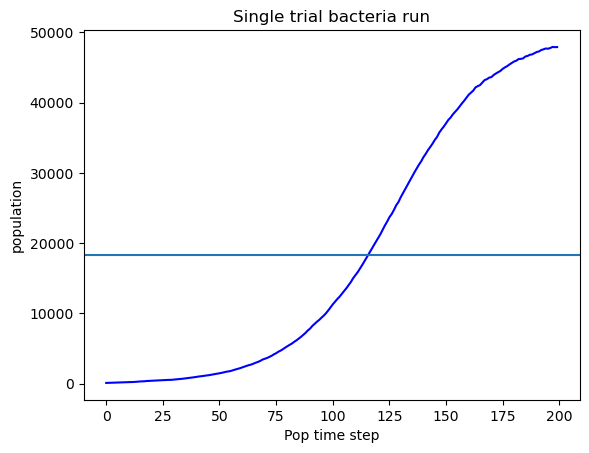

In [16]:
def simulation_singletrial_bacteria(num_bacteria,
                                  max_pop,
                                  birth_prob,
                                  death_prob,
                                   num_steps,
                                   to_plot=False):
    """
    Run a single trial simulation and return a population of bacteria.  
    """
    """
    To simulate a single bacteria dynamics, you need to implement below
        * instantiate a list of SimpleBacteria with list size as num_bacteria
        * instantiate a Patient using the list of SimpleBacteria
        * simulate changes to the bacteria population for num_steps timesteps,
          recording the bacteria population after each time step. Note
          that the first time step should contain the starting number of
          bacteria in the patient
          """
    """
    Args:
        num_bacteria (int): number of SimpleBacteria to create for patient
        max_pop (int): maximum bacteria population for patient
        birth_prob (float in [0, 1]): maximum reproduction
            probability, used to instantiate a SimpleBacteria object
        death_prob (float in [0, 1]): maximum death probability, used to instantiate a SimpleBacteria object
        num_steps (int): number of time steps updated on patient
        to_plot (bool) : plot the population sizes over the time steps if true 
            and not to plot if false
            """

    """
    Returns:
        population (list of numbers of bacteria at time steps): population[j] is the
            size of bacteria population at time step j
    
    If to_plot is true, plot bacteria population size (y-axis) as a function of
        elapsed time steps (x-axis)
    
    """
    #have to create the simplebacteria list from num_bacteria
    population = [None]*num_steps #total bact across all steps
    bacteria =[]
    for bact in range(num_bacteria):
        bacteria.append(SimpleBacteria(birth_prob, death_prob))
    patient = Patient(bacteria, max_pop)
    #update the number of bacteria for each step.
    for step in range(num_steps):
        population[step] = patient.update() #at each step in the population, bacteria is updated
    if to_plot:
        plot_bacterium(range(num_steps), population, 'Pop time step', 'population', 'Single trial bacteria run')
    else:
        return population

random.seed(0)
population = simulation_singletrial_bacteria(100, 100000, 0.2, 0.05, 200, True)
#You could try different arguments for the simulation

# Problem 4 Running and Analyzing Multiple Trials 

In this part you will continually simulate and understand the behavior of a group of bacteria cells as time passes. To address this problem, you need to implement the functions 
  * calc_avg_popsize 
  * simulation_multitrials_bacteria
  
  according to the behavior described in the docstrings in the provided code.
  
While you must implement *calc_avg_popsize*, you are also **required** to use it while implementing *simulation_multitrials_bacteria*. (That is, you need to call *calc_avg_popsize* in your function definition of *simulation_multitrials_bacteria*. 
  
When calling *simulation_multitrials_bacteria*, if to_plot is True, the function implementation produces a plot of your results as well as the populations. The plot should display the average bacteria population over time. You plot the average population across num_trials, so that the resulting curve is smooth and shows a general trend rather than the particular details of any one trial. 

Warning: It may take some time to generate the plot especially when your computer system is relatively slow or memory limited. 

Hint: simulation_multitrials_bacteria asks you to return a 2D list of populations at each time step for each trial such that populations[i][j] would be the population for the trial i at time step j. This means that if we are running 2 trials for 5 time steps, populations may look something like:
[ [10, 34, 22, 40, 21], [15, 27, 32, 25, 41] ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


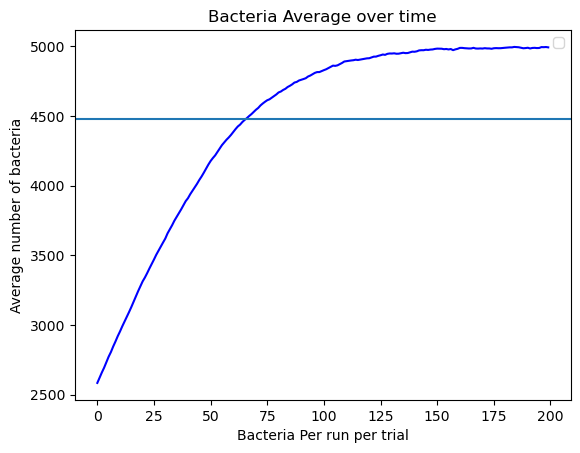

In [47]:
##########################
# PROBLEM 4
##########################

def calc_avg_popsize(populations, n):
    """
    Finds the average bacteria population size across trials at time step n

    Args:
        populations (list of lists or 2D array): populations[i][j] is the
            number of bacteria in trial i at time step j
        n (int): n indicates a time step point

    Returns:
        float: The average bacteria population size at time step n
    """

    #the avg pop across all trials[:] for run[0:-1]
    avg = []
    for trial in populations:
        trial_avg = []
        #print(trial)
        avg.append(trial[n])
    return np.average(avg)



def simulation_multitrials_bacteria(num_bacteria,
                                  max_pop,
                                  birth_prob,
                                  death_prob,
                                  num_steps,
                                  num_trials,
                                  to_plot=False):

    """
    Run multiple trials of the bactorial dynamics.

    For each of the num_trials trials:
        * instantiate a list of SimpleBacteria
        * instantiate a Patient using the list of SimpleBacteria
        * simulate changes to the bacteria population for num_steps timesteps,
          recording the bacteria population after each time step. Note
          that the first time step should contain the starting number of
          bacteria in the patient
    """
    """
    Args:
        num_bacteria (int): number of SimpleBacteria to create for patient
        max_pop (int): maximum bacteria population for patient
        birth_prob (float in [0, 1]): maximum reproduction probability
        death_prob (float in [0, 1]): maximum death probability
        num_steps (int): number of time steps updated on the patient
        num_trials (int): number of simulation runs to execute
        to_plot (bool) : plot the population sizes over the time steps if
            true and not to plot if false

    Returns:
        populations (list of lists or 2D array): populations[i][j] is the
            number of bacteria in trial i at time step j

    If to_plot is true, plot the average bacteria population size (y-axis)
    as a function of elapsed time steps (x-axis).

    """
    averages = []
    bacteria = []
    trial_pop = []
    #create self bacteria
    for trial in range(num_trials):
        population = [None]*num_steps #total across all steps
        for bacterium in range(num_bacteria):
            bacteria.append(SimpleBacteria(birth_prob, death_prob))
        patient = Patient(bacteria, max_pop)
    #update bacteria
        for step in range(num_steps):
            population[step] = patient.update() #pop gets updated with patients bact
        trial_pop.append(population)
    #get trial avg
    for x in range(num_steps):
        averages.append(calc_avg_popsize(trial_pop, x))
        
    if to_plot: #utilized matplotlib.org
        plt.figure()
        plt.plot(range(num_steps), averages, 'b')
        plt.axhline(np.mean(averages))
        plt.xlabel('Bacteria Per run per trial')
        plt.ylabel('Average number of bacteria')
        plt.title('Bacteria Average over time')
        plt.show()

#random.seed(0)
populations = simulation_multitrials_bacteria(100, 10000, 0.1, 0.05, 200, 50, True) #50 trials, 200 steps

